## Problem Statement :
CO2 Emissions by cars has been a major cause for global warming. Analysing the total CO2 emissions emitted by cars of Canada

## Objective: 
Predicting  CO2 emissions emitted by vehicles of Canada and understand the factors affecting the CO2 emission in cars


### Importing Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error ,r2_score, mean_absolute_error


In [9]:
import warnings
warnings.filterwarnings('ignore')

### Importing data

In [10]:
ds = pd.read_csv('CO2 Emissions_Canada.csv')

In [11]:
ds.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Data Description

Make: Represents the brand or manufacturer of the vehicle.

Model: Refers to the specific model of the vehicle.

Vehicle Class: Indicates the category or type of the vehicle.

Engine Size (L): Specifies the engine displacement, which is the total volume of all cylinders in the engine (measured in liters).

Cylinders: Indicates the number of cylinders in the engine.

Transmission: Describes the type of transmission used in the vehicle. AS5 refers to an automatic transmission with five speeds, while M6 refers to a manual transmission with six speeds.

Fuel Type: Specifies the type of fuel used by the vehicle.

Fuel Consumption City (L/100 km): Represents the estimated fuel consumption in liters per 100 kilometers of driving in city conditions.

Fuel Consumption Hwy (L/100 km): Represents the estimated fuel consumption in liters per 100 kilometers of driving on the highway.

Fuel Consumption Comb (L/100 km): Represents the estimated fuel consumption in liters per 100 kilometers of combined city and highway driving.

Fuel Consumption Comb (mpg): Represents the estimated fuel consumption in miles per gallon of combined city and highway driving.

CO2 Emissions (g/km): Specifies the estimated amount of carbon dioxide emissions produced by the vehicle in grams per kilometer.

## Data Preprocessing

In [12]:
ds.shape


(7385, 12)

### Renaming columns

In [13]:
ds = ds.rename(columns={
    'Engine Size(L)': 'Engine_Size',
    'Fuel Consumption City (L/100 km)': 'Fuel_Consumption_City',
    'Fuel Consumption Hwy (L/100 km)': 'Fuel_Consumption_Hwy',
    'Fuel Consumption Comb (L/100 km)': 'Fuel_Consumption_Comb',
    'Fuel Consumption Comb (mpg)': 'Fuel_Consumption_Comb1',
    'CO2 Emissions(g/km)': 'CO2_Emission'    
})

In [14]:
ds.head()

,Make,Model,Vehicle Class,Engine_Size,Cylinders,Transmission,Fuel Type,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb1,CO2_Emission
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Checking for missing values

In [15]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Make                    7385 non-null   object 
 1   Model                   7385 non-null   object 
 2   Vehicle Class           7385 non-null   object 
 3   Engine_Size             7385 non-null   float64
 4   Cylinders               7385 non-null   int64  
 5   Transmission            7385 non-null   object 
 6   Fuel Type               7385 non-null   object 
 7   Fuel_Consumption_City   7385 non-null   float64
 8   Fuel_Consumption_Hwy    7385 non-null   float64
 9   Fuel_Consumption_Comb   7385 non-null   float64
 10  Fuel_Consumption_Comb1  7385 non-null   int64  
 11  CO2_Emission            7385 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 692.5+ KB


In [16]:
ds.isnull().sum()

Make                      0
Model                     0
Vehicle Class             0
Engine_Size               0
Cylinders                 0
Transmission              0
Fuel Type                 0
Fuel_Consumption_City     0
Fuel_Consumption_Hwy      0
Fuel_Consumption_Comb     0
Fuel_Consumption_Comb1    0
CO2_Emission              0
dtype: int64

There are no null values in our columns

### Duplicate Data

In [17]:
duplicate = ds.duplicated().sum()
print('There are {} duplicated rows in the data'.format(duplicate))

There are 1103 duplicated rows in the data


In [18]:
ds.drop_duplicates(inplace=True)

In [19]:
ds.reset_index(inplace=True, drop=True)

In [20]:
ds.shape

(6282, 12)

### Renaming  Transmission with more descriptive label

Transmission codes are replaced with more descriptive labels, such as 'Automatic', 'Automatic of Selective type', 'Automated Manual', 'CVT', and 'Manual', while leaving other values unchanged in the 'Transmission' column of the dataset.

In [21]:
ds['Transmission'] = np.where(ds['Transmission'].isin(['A4','A5','A6','A7','A8','A9','A10']),'Automatic',ds['Transmission'])
ds['Transmission'] = np.where(ds['Transmission'].isin(['AS4','AS5','AS6','AS7','AS8','AS9','AS10']),'Automatic of Selective type',ds['Transmission'])
ds['Transmission'] = np.where(ds['Transmission'].isin(['AM5','AM6','AM7','AM8','AM9']),'Automated Manual',ds['Transmission'])
ds['Transmission'] = np.where(ds['Transmission'].isin(['AV','AV6','AV7','AV8','AV10']),'CVT',ds['Transmission'])
ds['Transmission'] = np.where(ds['Transmission'].isin(['M5','M6','M7']),'Manual',ds['Transmission'])

print(ds['Transmission'].unique())

['Automatic of Selective type' 'Manual' 'CVT' 'Automated Manual'
 'Automatic']


### Renaming Fuel Type with more descriptive label

Fuel Type replaces specific fuel type codes ('X', 'Z', 'E', 'D', 'N') with more descriptive labels ('Regular gasoline', 'Premium gasoline', 'Ethanol', 'Diesel', 'Natural gas'), while 
leaving other values unchanged in the 'Fuel Type' column of the dataset.

In [22]:
print(ds['Fuel Type'].value_counts())


ds['Fuel Type']= np.where(ds['Fuel Type']=='Z','Premium gasoline',ds['Fuel Type'])
ds['Fuel Type']= np.where(ds['Fuel Type']=='E','Ethanol',ds['Fuel Type'])
ds['Fuel Type']= np.where(ds['Fuel Type']=='D','Diesel',ds['Fuel Type'])
ds['Fuel Type']= np.where(ds['Fuel Type']=='N','Natural gas',ds['Fuel Type'])
ds['Fuel Type']= np.where(ds['Fuel Type']=='X','Regular gasoline',ds['Fuel Type'])

print(ds['Fuel Type'].unique())

X    3039
Z    2765
E     330
D     147
N       1
Name: Fuel Type, dtype: int64
['Premium gasoline' 'Diesel' 'Regular gasoline' 'Ethanol' 'Natural gas']


Dropping natural gas as there is only one data we have which would not make much difference in modelling

In [23]:
ds_N = ds[ds['Fuel Type']== 'Natural gas']
ds_N

,Make,Model,Vehicle Class,Engine_Size,Cylinders,Transmission,Fuel Type,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb1,CO2_Emission
2232,CHEVROLET,IMPALA DUAL FUEL,MID-SIZE,3.6,6,Automatic of Selective type,Natural gas,15.2,9.5,12.7,22,213


In [24]:
ind = ds_N.index
for i in ind:
    ds.drop(i, axis=0, inplace=True)  
ds[ds['Fuel Type']=='Natural gas']


,Make,Model,Vehicle Class,Engine_Size,Cylinders,Transmission,Fuel Type,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb1,CO2_Emission


In [25]:
data_num_features = ds.select_dtypes(include=np.number)

print('The numerical columns in the dataset are: ',data_num_features.columns)

The numerical columns in the dataset are:  Index(['Engine_Size', 'Cylinders', 'Fuel_Consumption_City',
       'Fuel_Consumption_Hwy', 'Fuel_Consumption_Comb',
       'Fuel_Consumption_Comb1', 'CO2_Emission'],
      dtype='object')


### Outlier Analysis 

In [26]:
data_num_features.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,Engine_Size,Cylinders,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb1,CO2_Emission
count,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000
mean,3.161742,5.618851,12.609807,9.070514,11.017609,27.411877,251.163827
std,1.365299,1.846391,3.553199,2.279059,2.947034,7.245573,59.293191
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
1%,1.400000,3.000000,5.500000,5.300000,5.600000,14.000000,131.000000
5%,1.500000,4.000000,8.000000,6.100000,7.200000,17.000000,170.000000
10%,1.600000,4.000000,8.700000,6.600000,7.800000,19.000000,182.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.700000,10.300000,12.700000,32.000000,289.000000


In [27]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return(x)

In [28]:
data_num_features=data_num_features.apply(lambda x : outlier_cap(x))

In [29]:
data_num_features.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,Engine_Size,Cylinders,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb1,CO2_Emission
count,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000
mean,3.161344,5.617577,12.588330,9.055580,11.002063,27.353288,251.021653
std,1.354785,1.840599,3.446365,2.200382,2.857374,6.957755,58.054747
min,1.400000,3.000000,5.500000,5.300000,5.600000,14.000000,131.000000
1%,1.400000,3.000000,5.500000,5.300000,5.600000,14.000000,131.000000
5%,1.500000,4.000000,8.000000,6.100000,7.200000,17.000000,170.000000
10%,1.600000,4.000000,8.700000,6.600000,7.800000,19.000000,182.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.700000,10.300000,12.700000,32.000000,289.000000


### Correlation of dependent variable with the independent variables 

In [30]:
ds.corr()['CO2_Emission'].sort_values()

Fuel_Consumption_Comb1   -0.906929
Cylinders                 0.834739
Engine_Size               0.854870
Fuel_Consumption_Hwy      0.883475
Fuel_Consumption_Comb     0.916953
Fuel_Consumption_City     0.918900
CO2_Emission              1.000000
Name: CO2_Emission, dtype: float64

In [31]:
ds.corr()

,Engine_Size,Cylinders,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb1,CO2_Emission
Engine_Size,1.000000,0.928843,0.834233,0.766816,0.820145,-0.762957,0.854870
Cylinders,0.928843,1.000000,0.801290,0.717645,0.781104,-0.723741,0.834739
Fuel_Consumption_City,0.834233,0.801290,1.000000,0.950832,0.994054,-0.927634,0.918900
Fuel_Consumption_Hwy,0.766816,0.717645,0.950832,1.000000,0.978618,-0.891912,0.883475
Fuel_Consumption_Comb,0.820145,0.781104,0.994054,0.978618,1.000000,-0.925798,0.916953
Fuel_Consumption_Comb1,-0.762957,-0.723741,-0.927634,-0.891912,-0.925798,1.000000,-0.906929
CO2_Emission,0.854870,0.834739,0.918900,0.883475,0.916953,-0.906929,1.000000


## Exploratory Data Analysis

### Statistical Summary

In [32]:
ds.describe()

,Engine_Size,Cylinders,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb1,CO2_Emission
count,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000
mean,3.161742,5.618851,12.609807,9.070514,11.017609,27.411877,251.163827
std,1.365299,1.846391,3.553199,2.279059,2.947034,7.245573,59.293191
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.700000,10.300000,12.700000,32.000000,289.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


### HeatMap

#### We use heatmap to graphically represent correlation matrix and understand the strength of linear relationship among the  variables.

Text(0.5, 1.0, 'Correlation')

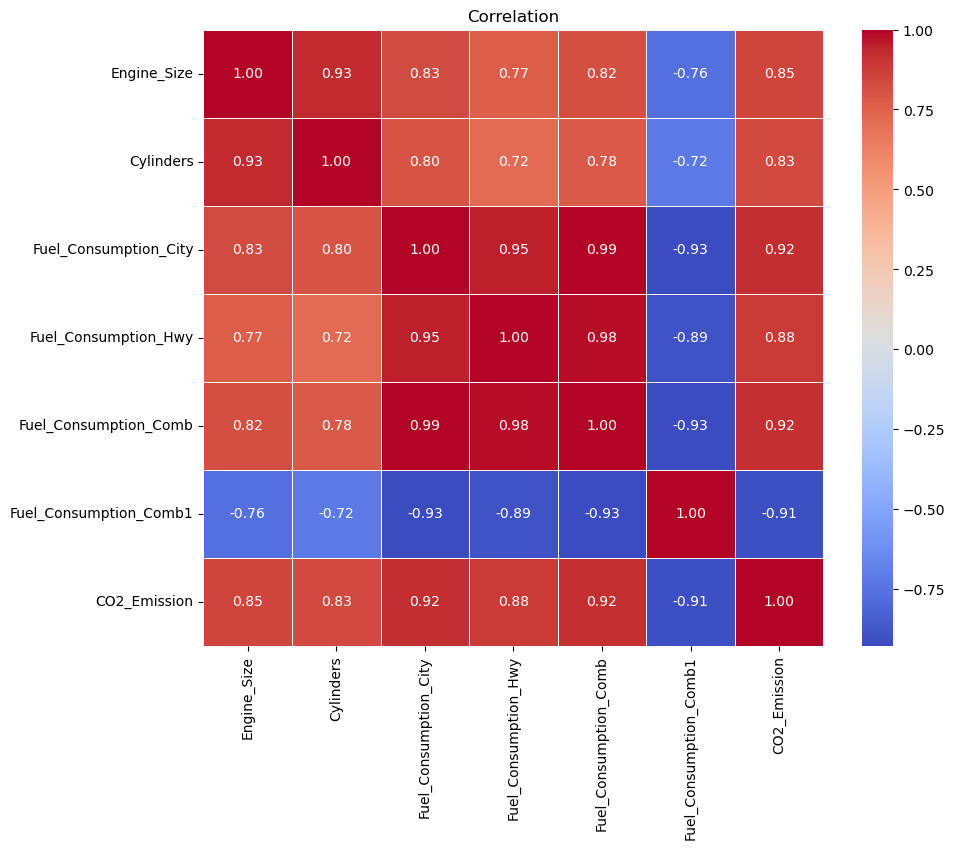

In [33]:
corr = ds.corr()

plt.rcParams['figure.figsize']=(10,8)
sns.heatmap(corr, cmap='coolwarm', linewidth=0.5, fmt='0.2f', annot=True)

plt.title('Correlation')

Fuel_Consumption_Comb1 has a high negative correaltion(<-0.9) with CO2_Emissions, Fuel_Consumption_Comb and Fuel_Consumption_City
CO2_Emissions has high positive correlation(>0.9) with Fuel_Consumption_Comb and Fuel_Consumption_City

### Histograms

#### We are using histograms to understand the distribution of various numerical features. We could have chosen density plots for the same.

array([[<AxesSubplot:title={'center':'Engine_Size'}>,
        <AxesSubplot:title={'center':'Cylinders'}>,
        <AxesSubplot:title={'center':'Fuel_Consumption_City'}>],
       [<AxesSubplot:title={'center':'Fuel_Consumption_Hwy'}>,
        <AxesSubplot:title={'center':'Fuel_Consumption_Comb'}>,
        <AxesSubplot:title={'center':'Fuel_Consumption_Comb1'}>],
       [<AxesSubplot:title={'center':'CO2_Emission'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

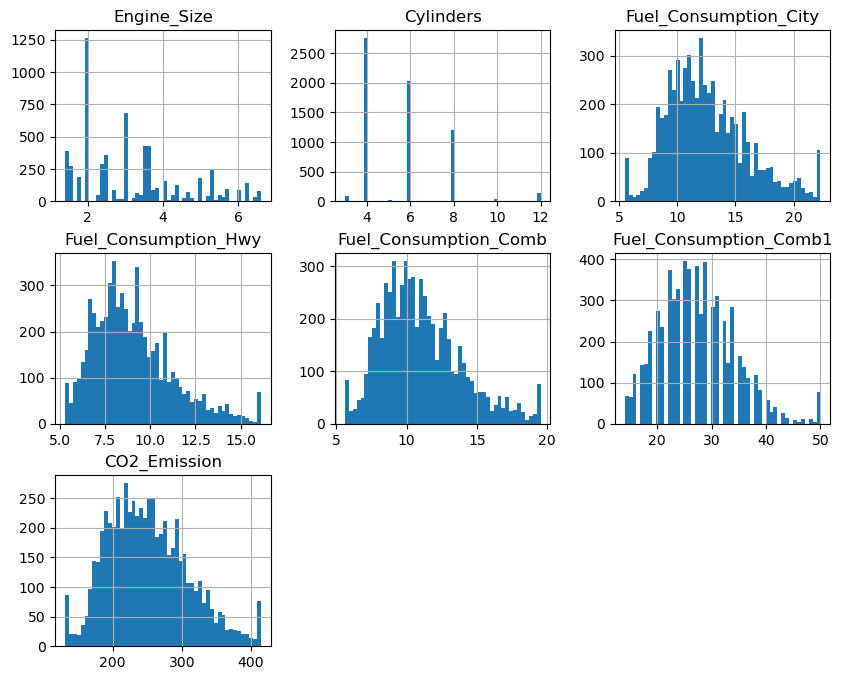

In [34]:
data_num_features.hist(figsize=(10,8),bins=50)

We can see most of our numerical features' graphs are positively skewed (right skewed)

### Bar Graphs

#### To understand the frequency distribuition of various categorical features

In [35]:
data_cat_features = ds.select_dtypes(include='object')
print('The categorical columns in the dataset are: ',data_cat_features.columns)

The categorical columns in the dataset are:  Index(['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type'], dtype='object')


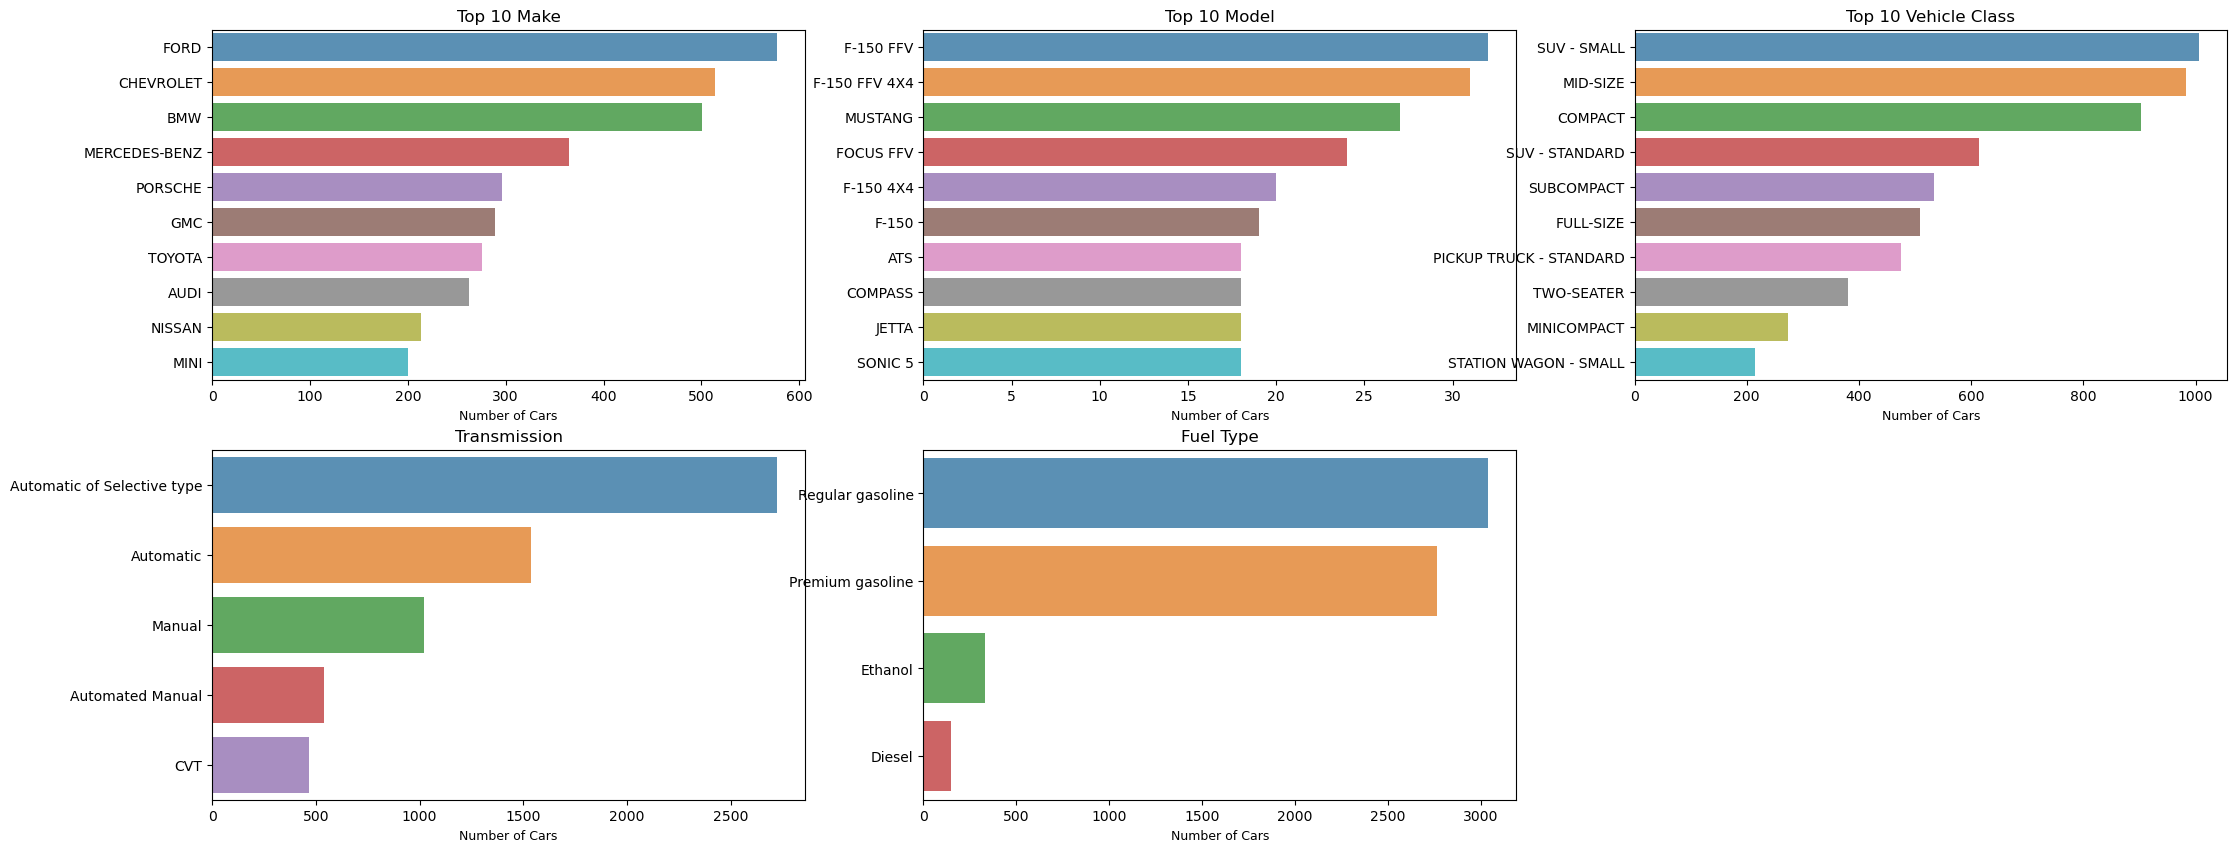

In [36]:
fig,ax= plt.subplots(nrows=2,ncols=3,figsize=(26, 10)) 

for variable, subplot in zip(data_cat_features.columns,ax.flatten()):
    cat_count  = ds[variable].value_counts()
    cat_count10 = cat_count[:10,]
    z = sns.barplot(cat_count10.values,cat_count10.index, alpha=0.8, ax=subplot)
    if cat_count.size > 10:
        z.set_title('Top 10 {}'.format(variable))
    else:
        z.set_title(variable)
    z.set_xlabel('Number of Cars', fontsize=9)
    
fig.delaxes(ax[1][2])

Top 10 Make: Most of the cars on Canadian roads are made by Ford

Top 10 Model: The F-150 FFV is amongst the most famous models driven in Canada

Top 10 Vehicle_Class: SUV-Small is the preferred class of vehicle amongst the Canadians

Top 10 Transmission: More than 1000 cars have AS6 and AS8 transmission types

Fuel Type: Majority of the cars in Canada use Fuel type Regular gasoline and Premium gasoline

### Feature Distribution of categorical features with CO2 Emission

In [37]:
make_co2 = ds.groupby('Make')['CO2_Emission'].mean().sort_values(ascending=False).head(10)
model_co2 = ds.groupby('Model')['CO2_Emission'].mean().sort_values(ascending=False).head(10)
vehicle_class_co2 = ds.groupby('Vehicle Class')['CO2_Emission'].mean().sort_values(ascending=False).head(10)
transmission_co2 = ds.groupby('Transmission')['CO2_Emission'].mean().sort_values(ascending=False).head(10)
fuel_type_co2 = ds.groupby('Fuel Type')['CO2_Emission'].mean().sort_values(ascending=False).head()

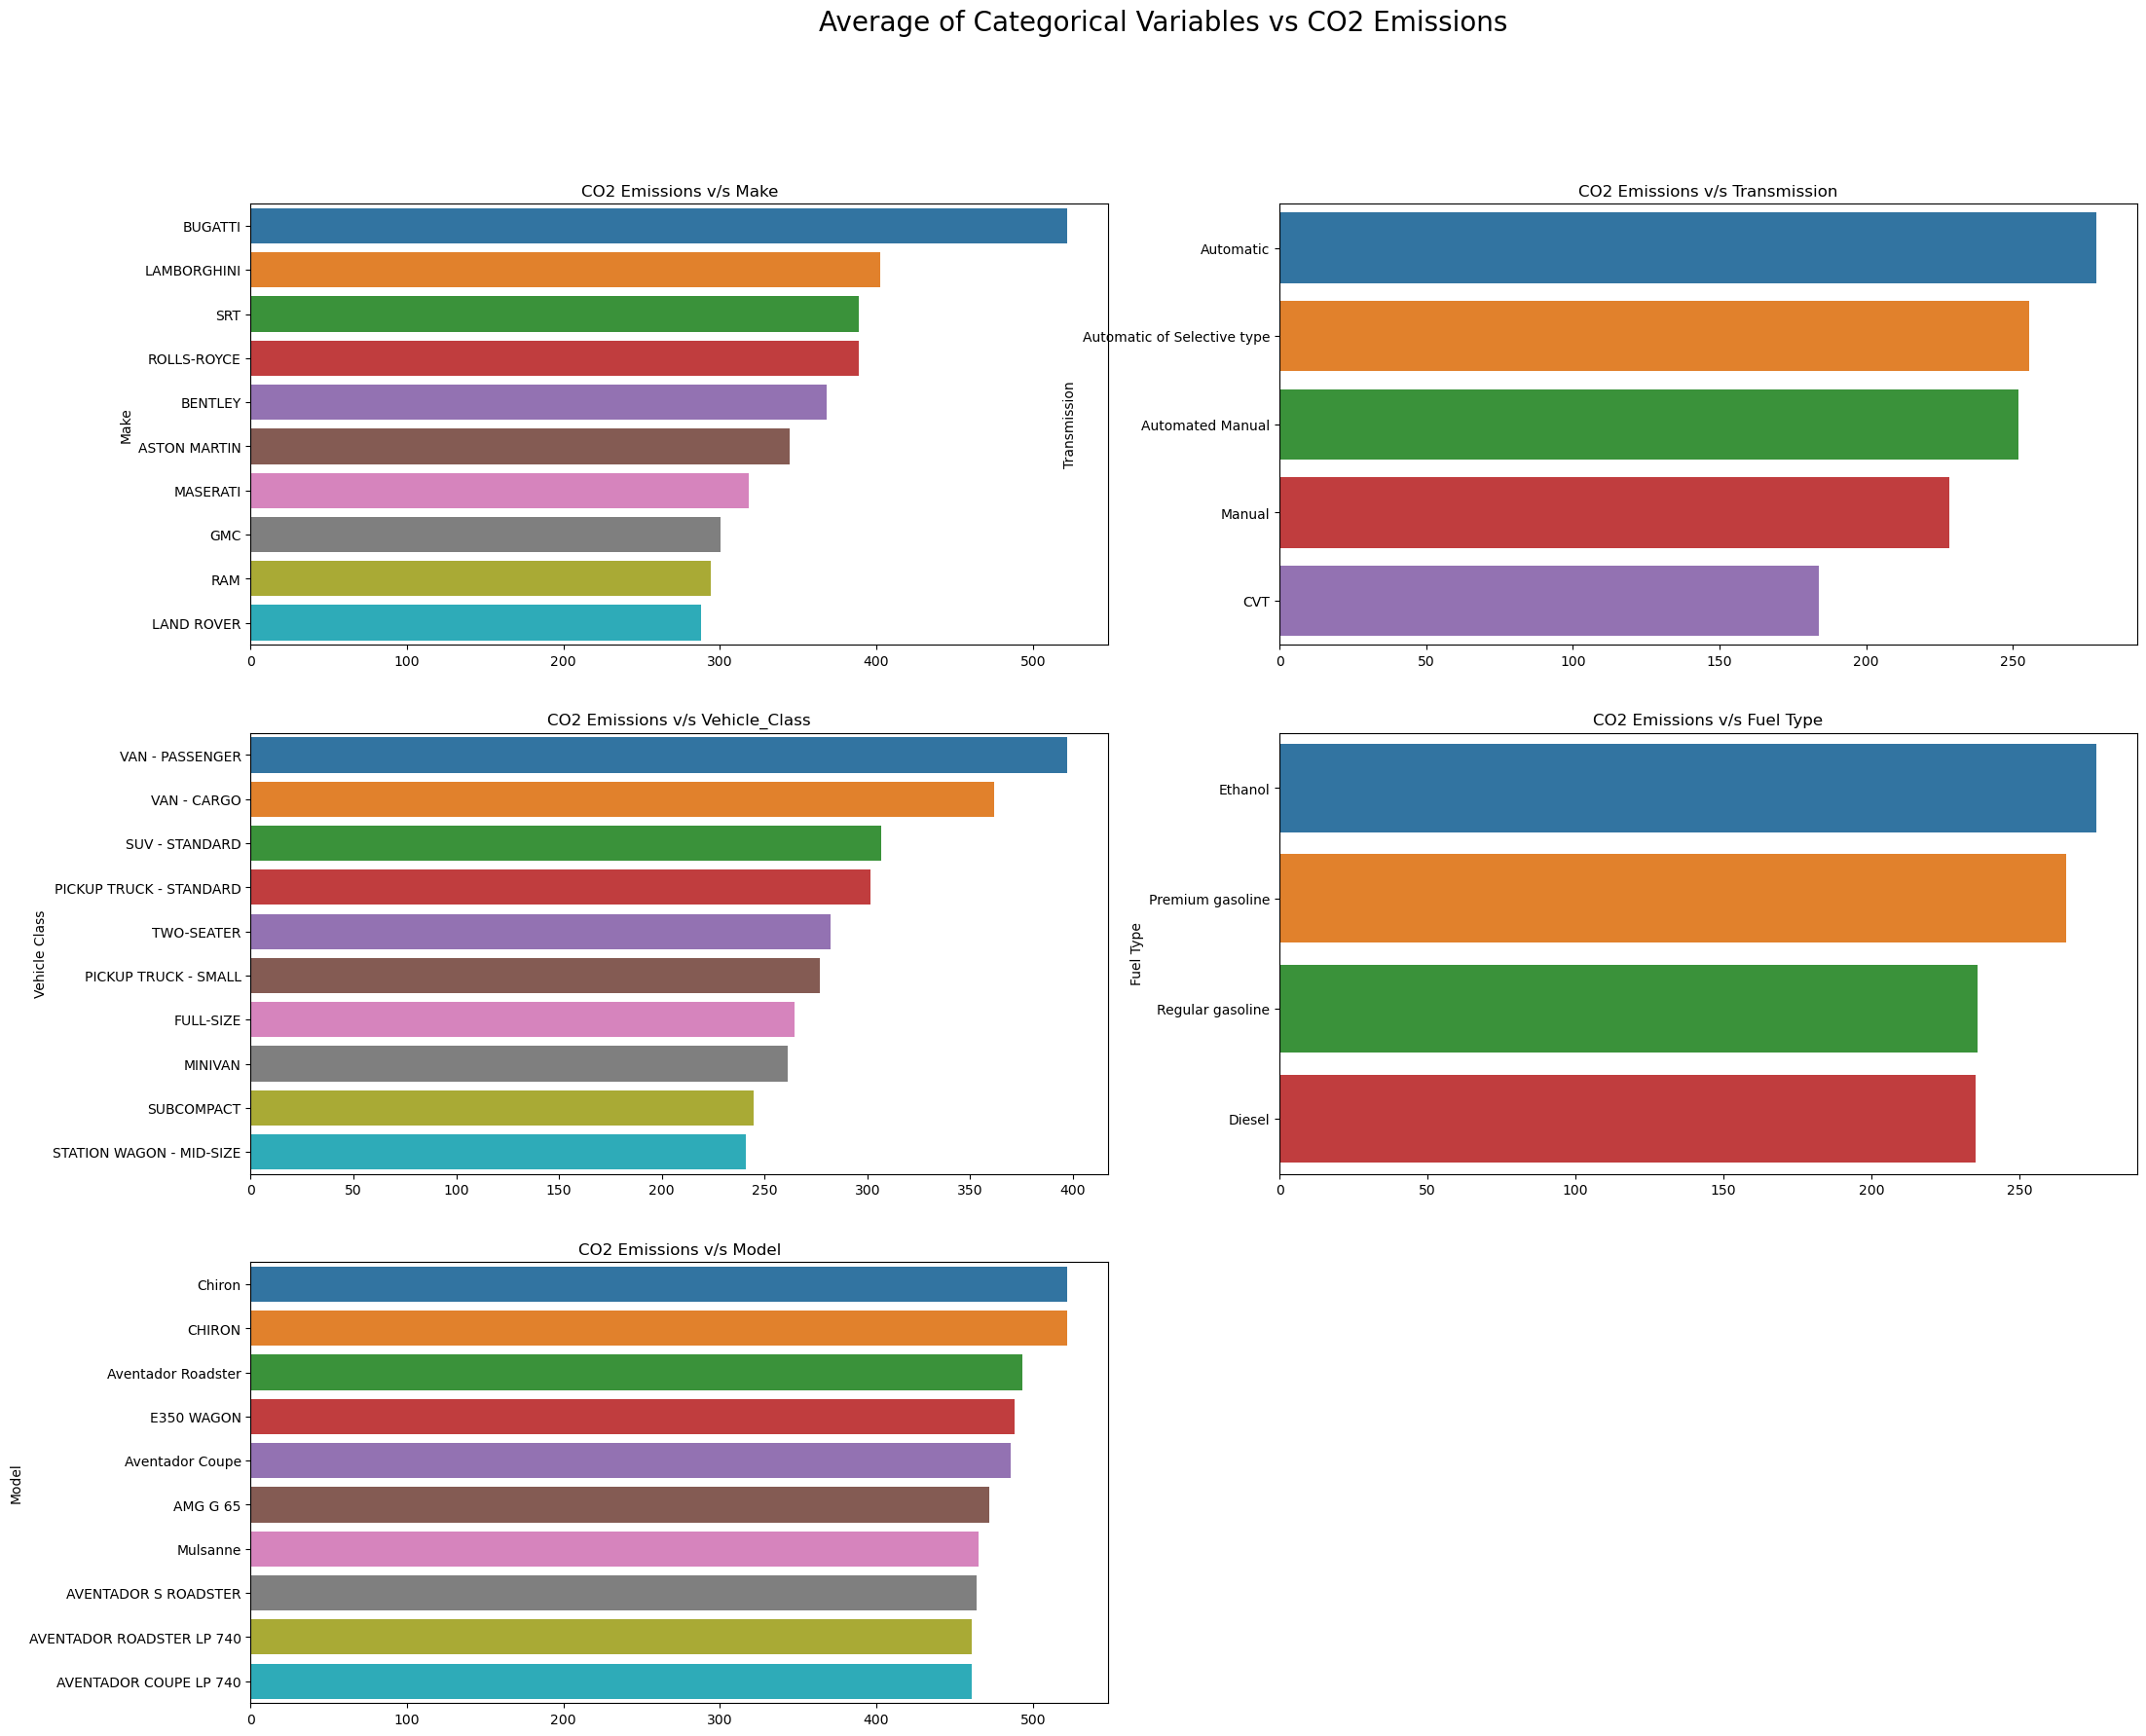

In [38]:
fig, axes = plt.subplots(3,2, figsize=(25,20))
fig.suptitle('Average of Categorical Variables vs CO2 Emissions', size=20)

sns.barplot(ax=axes[0][0],x = make_co2.values,y = make_co2.index)
axes[0][0].set_title('CO2 Emissions v/s Make')

sns.barplot(ax=axes[0][1],x = transmission_co2.values,y = transmission_co2.index)
axes[0][1].set_title('CO2 Emissions v/s Transmission')

sns.barplot(ax=axes[1][0],x = vehicle_class_co2.values,y = vehicle_class_co2.index)
axes[1][0].set_title('CO2 Emissions v/s Vehicle_Class')

sns.barplot(ax=axes[1][1], x=fuel_type_co2.values,y=fuel_type_co2.index)
axes[1][1].set_title('CO2 Emissions v/s Fuel Type')

sns.barplot(ax=axes[2][0],x = model_co2.values,y = model_co2.index)
axes[2][0].set_title('CO2 Emissions v/s Model')


fig.delaxes(axes[2][1])
plt.show()

CO2 Emissions v/s Make: While Ford cars are mainly found on the roads of Canada , its Bugatti that emit the most CO2 per car

CO2 Emissions v/s Model: Bugatti Chiron is amongst the most CO2 emitting car model

CO2 Emissions v/s Vehicle_Class: Most of the heavy vehicles like Vans , SUV and Pick-up truck are amongst the top few emitters of CO2

CO2 Emissions v/s Transmission: Most of the cars with automatic transmission emit CO2

CO2 Emissions v/s Fuel_Type: Cars using Fuel Type Ethanol are emitting the most CO2

### Scatter Plot




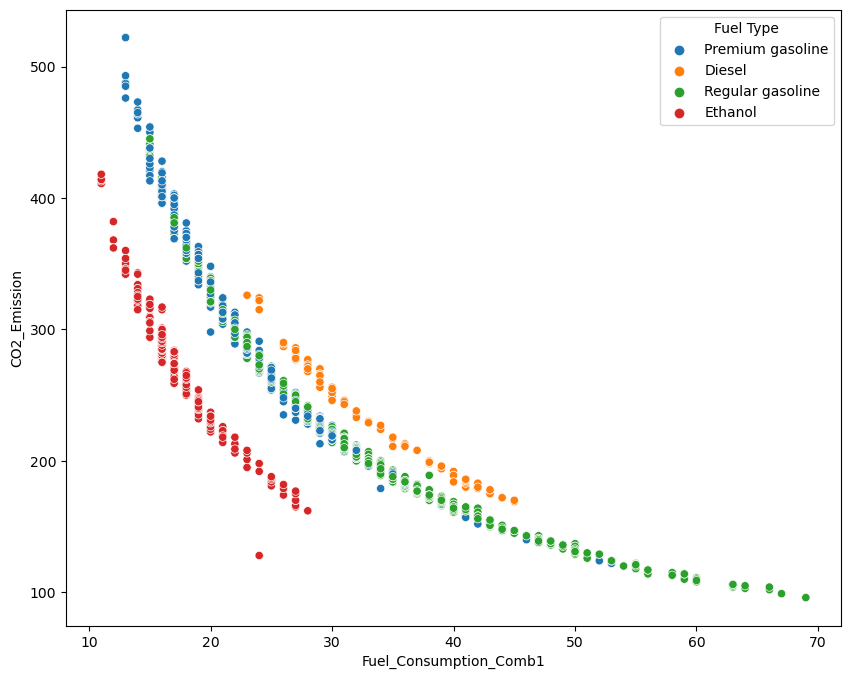

In [39]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Fuel_Consumption_Comb1', y='CO2_Emission', data=ds,hue='Fuel Type')
plt.show()


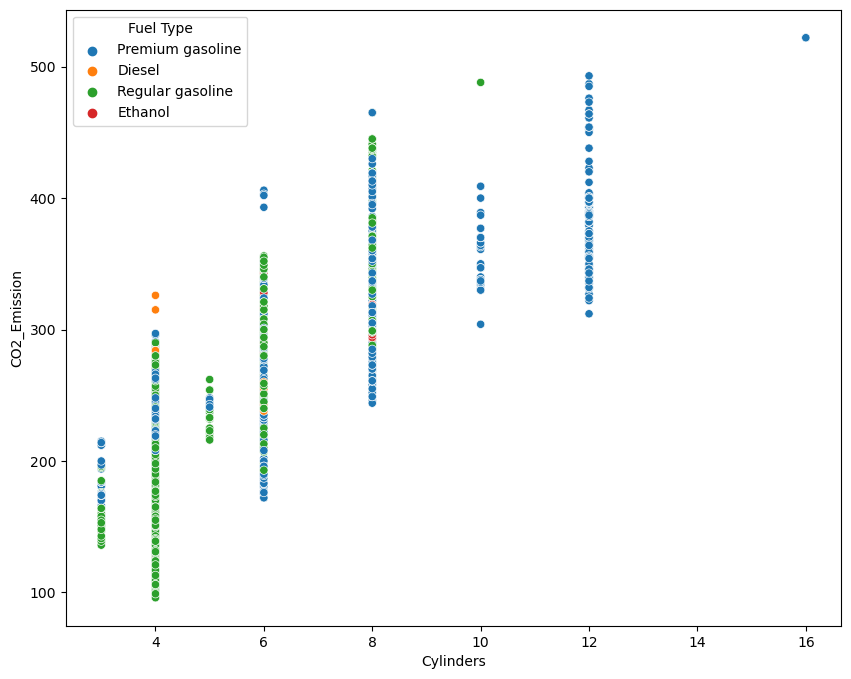

In [40]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Cylinders', y='CO2_Emission', data=ds, hue='Fuel Type')
plt.show()
  

As the number of cylinders increase, the CO2 emissions increase

Cars with 8 and less than 8 cylinders prefer using Fuel Type Regular Gasoline which result in less emissions of CO2

Fuel Type Premium Gasoline results in more CO2 emissions than the other

## Feature Engineering

Create a new feature Make_Type by combining various car companies(Make) on the basis of their functionality
<br>
There are 42 unique Car Companies. We will divide these companies into Luxury, Sports, Premium and General cars

In [41]:
ds['Make_Type'] = ds['Make'].replace(['BUGATTI', 'PORSCHE', 'MASERATI', 'ASTON MARTIN', 'LAMBORGHINI', 'JAGUAR', 'SRT'], 'Sports')
ds['Make_Type'] = ds['Make_Type'].replace(['ALFA ROMEO', 'AUDI', 'BMW', 'BUICK', 'CADILLAC', 'CHRYSLER', 'DODGE', 'GMC', 'INFINITI', 'JEEP', 'LAND ROVER', 'LEXUS', 'MERCEDES-BENZ', 'MINI', 'SMART', 'VOLVO'], 'Premium')
ds['Make_Type'] = ds['Make_Type'].replace(['ACURA', 'BENTLEY', 'LINCOLN', 'ROLLS-ROYCE', 'GENESIS'], 'Luxury')
ds['Make_Type'] = ds['Make_Type'].replace(['CHEVROLET', 'FIAT', 'FORD', 'KIA', 'HONDA', 'HYUNDAI', 'MAZDA', 'MITSUBISHI', 'NISSAN', 'RAM', 'SCION', 'SUBARU', 'TOYOTA', 'VOLKSWAGEN'], 'General')


In [42]:
ds.drop(['Make'], inplace=True, axis=1)

ds['Make_Type'].unique()

array(['Luxury', 'Premium', 'Sports', 'General'], dtype=object)

In [43]:
ds['Make_Type'].value_counts()

General    2775
Premium    2731
Sports      546
Luxury      229
Name: Make_Type, dtype: int64

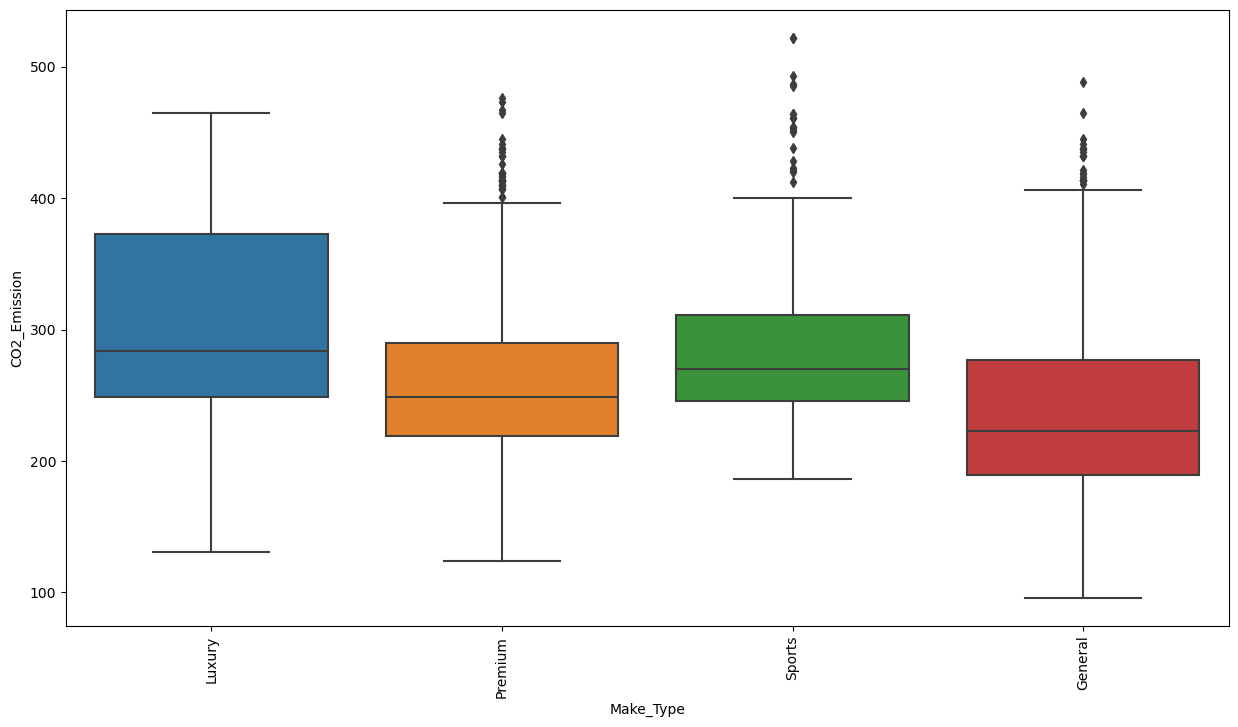

In [44]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="Make_Type", y="CO2_Emission", data=ds)
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)
plt.show()

The plot shows that Sports cars and Luxury cars emit more CO2 compared to Premium and General use cars

Create a new feature Vehicle_Class_Type by combining various Vehicle_Class on the basis of their size
<br>
 We will divide them into Hatchback, Sedan, SUV and Truck

In [45]:
ds['Vehicle_Class_Type'] = ds['Vehicle Class'].replace(['COMPACT', 'MINICOMPACT', 'SUBCOMPACT'], 'Hatchback')
ds['Vehicle_Class_Type'] = ds['Vehicle_Class_Type'].replace(['MID-SIZE', 'TWO-SEATER', 'FULL-SIZE', 'STATION WAGON - SMALL', 'STATION WAGON - MID-SIZE'], 'Sedan')
ds['Vehicle_Class_Type'] = ds['Vehicle_Class_Type'].replace(['SUV - SMALL', 'SUV - STANDARD', 'MINIVAN'], 'SUV')
ds['Vehicle_Class_Type'] = ds['Vehicle_Class_Type'].replace(['VAN - CARGO', 'VAN - PASSENGER', 'PICKUP TRUCK - STANDARD', 'SPECIAL PURPOSE VEHICLE', 'PICKUP TRUCK - SMALL'], 'Truck')


In [46]:
ds.drop(['Vehicle Class'], inplace=True,  axis=1)

ds['Vehicle_Class_Type'].unique()

array(['Hatchback', 'SUV', 'Sedan', 'Truck'], dtype=object)

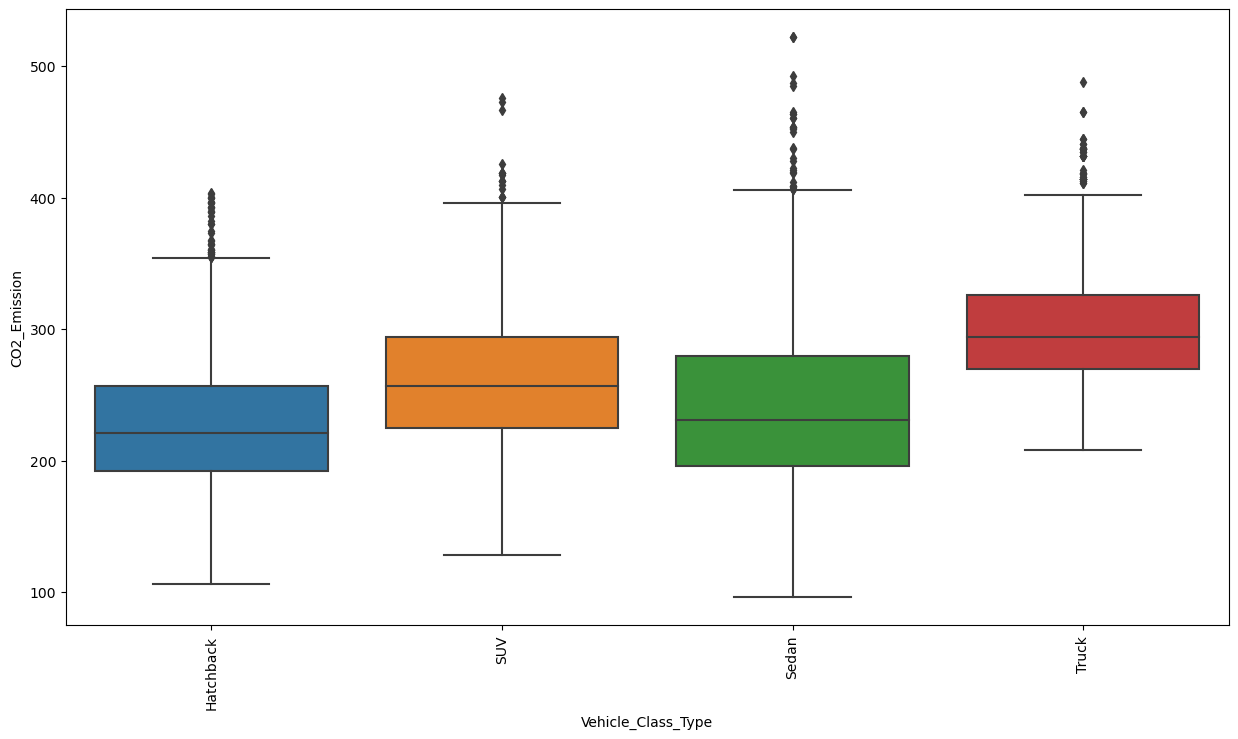

In [47]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="Vehicle_Class_Type", y="CO2_Emission", data=ds)
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)
plt.show()

The plot shows that the bigger the cars are the more CO2 they emit

## Encoding Categorical Features

Creating dummy variables of Fuel Type and Transmission,Make_Type,Vehicle_Class_Type (catagorical features)as do not possess any inherent ordinality or numerical relationship

In [48]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6281 entries, 0 to 6281
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Model                   6281 non-null   object 
 1   Engine_Size             6281 non-null   float64
 2   Cylinders               6281 non-null   int64  
 3   Transmission            6281 non-null   object 
 4   Fuel Type               6281 non-null   object 
 5   Fuel_Consumption_City   6281 non-null   float64
 6   Fuel_Consumption_Hwy    6281 non-null   float64
 7   Fuel_Consumption_Comb   6281 non-null   float64
 8   Fuel_Consumption_Comb1  6281 non-null   int64  
 9   CO2_Emission            6281 non-null   int64  
 10  Make_Type               6281 non-null   object 
 11  Vehicle_Class_Type      6281 non-null   object 
dtypes: float64(4), int64(3), object(5)
memory usage: 637.9+ KB


### Dropping Model column

In [49]:
ds.drop(['Model'],axis=1,inplace=True)

In [50]:
ds.head()

,Engine_Size,Cylinders,Transmission,Fuel Type,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb1,CO2_Emission,Make_Type,Vehicle_Class_Type
0,2.0,4,Automatic of Selective type,Premium gasoline,9.9,6.7,8.5,33,196,Luxury,Hatchback
1,2.4,4,Manual,Premium gasoline,11.2,7.7,9.6,29,221,Luxury,Hatchback
2,1.5,4,CVT,Premium gasoline,6.0,5.8,5.9,48,136,Luxury,Hatchback
3,3.5,6,Automatic of Selective type,Premium gasoline,12.7,9.1,11.1,25,255,Luxury,SUV
4,3.5,6,Automatic of Selective type,Premium gasoline,12.1,8.7,10.6,27,244,Luxury,SUV


Since Model has 2053 unique values and has no significance with respect to CO2 Emissions , we have dropped this column

In [51]:
df_dummies = pd.get_dummies(data = ds[["Fuel Type","Transmission","Make_Type","Vehicle_Class_Type"]], drop_first = True)

df_num_features=ds.select_dtypes(include=np.number)


In [52]:
df_num_features=df_num_features.drop(['CO2_Emission'], axis=1)

In [53]:
df_1 = pd.concat([df_dummies, ds['CO2_Emission'],df_num_features], axis=1)


In [54]:
X=df_1.drop(['CO2_Emission'],axis=1)
y=df_1['CO2_Emission']

## OLS Model

In [55]:
import statsmodels.api as sm

In [56]:
X = sm.add_constant(X)

In [57]:
from sklearn.model_selection import train_test_split


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [59]:
MLR_model1 = sm.OLS(y_train, X_train).fit()
MLR_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           CO2_Emission   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 3.286e+04
Date:                Thu, 22 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:49:02   Log-Likelihood:                -13238.
No. Observations:                4396   AIC:                         2.652e+04
Df Residuals:                    4376   BIC:                         2.664e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       82.8547      1.870     44.303      0.000      79.188      86.521
Fuel Type_Ethanol                         -137.7863      0.726   -189.680      0.000    -139.210    -136.362
Fuel Type_Premium gasoline                 -29.8549      0.550    -54.300      0.000     -30.933     -28.777
Fuel Type_Regular gasoline                 -29.8486      0.521    -57.334      0.000     -30.869     -28.828
Transmission_Automatic                      -1.3972      0.350     -3.992      0.000      -2.083      -0.711
Transmission_Automatic of Selective type    -1.2739      0.309     -4.123      0.000      -1.880      -0.668
Transmission_CVT                            -1.0348      0.420     -2.462      0.014      -1.859      -0.211
Transmission_Manual                         -1.3051      0.334     -3.912      0.000      -1.959      -0.651
Make_Type_Luxury                             0.9320      0.438      2.128      0.033       0.073       1.791
Make_Type_Premium                           -0.6042      0.207     -2.915      0.004      -1.011      -0.198
Make_Type_Sports                            -0.2859      0.353     -0.810      0.418      -0.978       0.406
Vehicle_Class_Type_SUV                       1.4016      0.270      5.196      0.000       0.873       1.930
Vehicle_Class_Type_Sedan                     0.7595      0.201      3.784      0.000       0.366       1.153
Vehicle_Class_Type_Truck                     2.1052      0.384      5.488      0.000       1.353       2.857
Engine_Size                                  0.1525      0.175      0.872      0.383      -0.190       0.496
Cylinders                                    1.0340      0.126      8.219      0.000       0.787       1.281
Fuel_Consumption_City                        6.3346      0.954      6.638      0.000       4.464       8.206
Fuel_Consumption_Hwy                         4.6616      0.799      5.834      0.000       3.095       6.228
Fuel_Consumption_Comb                        8.8866      1.736      5.118      0.000       5.482      12.291
Fuel_Consumption_Comb1                      -0.8265      0.032    -25.622      0.000      -0.890      -0.763
==============================================================================
Omnibus:                     1232.539   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            81691.210
Skew:                          -0.428   Prob(JB):                         0.00
Kurtosis:                      24.101   Cond. No.                         987.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
""

###  Assumption #1: Linear Relationship Between Dependent and Independent Variable<a id="lr_dep_ind"></a>

The Rainbow Test is a hypothesis test used to assess the linearity assumption in regression models. It examines whether the relationship between the independent variables and the dependent variable is adequately captured by a linear model or if there is evidence of nonlinearity.

The null hypothesis for the Rainbow Test is that the relationship between the independent variables and the dependent variable is linear, while the alternative hypothesis is that there is evidence of nonlinearity.

In [60]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res=MLR_model1, frac=0.5)#the fraction of the data to include in the center model

(0.9747909199073101, 0.72479429784453)

The Rainbow Test does not provide strong evidence of nonlinearity in your regression model. The linearity assumption appears to be reasonably satisfied.

###  Assumption #2: Checking for Autocorrelation

It's value ranges from 0-4. If the value of Durbin- Watson is Between 0-2, it's known as Positive Autocorrelation. If the value ranges from 2-4, it is known as Negative autocorrelation. If the value is exactly 2, it means No Autocorrelation. For a good linear model, it should have low or no autocorrelation. we can see here the values of dublin watson test: 1.995 (No AUTO-CORRELATION)

We can observe that the value obtained from the `Durbin-Watson` from the OLS Summary test statistic is close to **2** (1.99). Thus, we conclude that there is near to no autocorrelation.

###  Assumption #3: Checking for Heteroskedasticity

Breusch-Pagan is one of the tests for detecting heteroskedasticity in the residuals.<br>
The test hypothesis for the Breusch-Pagan test is given as:
<p style='text-indent:25em'> <strong> H<sub>o</sub>:  There is homoscedasticity present in the data </strong> </p>
<p style='text-indent:25em'> <strong> H<sub>1</sub>:  There is a heteroscedasticity present in the data </strong> </p>

In [61]:
import statsmodels.stats.api as sms

name = ['f-value','p-value']
test = sms.het_breuschpagan(MLR_model1.resid, MLR_model1.model.exog)
result = list(zip(name, test[2:]))

print(result)

[('f-value', 94.66546547785326), ('p-value', 3.899778955723885e-309)]


We observe that the p-value is less than 0.05; thus, we conclude that there is heteroskedasticity present in the data.

###  Assumption #4: Tests for Normality

#### Q-Q Plot

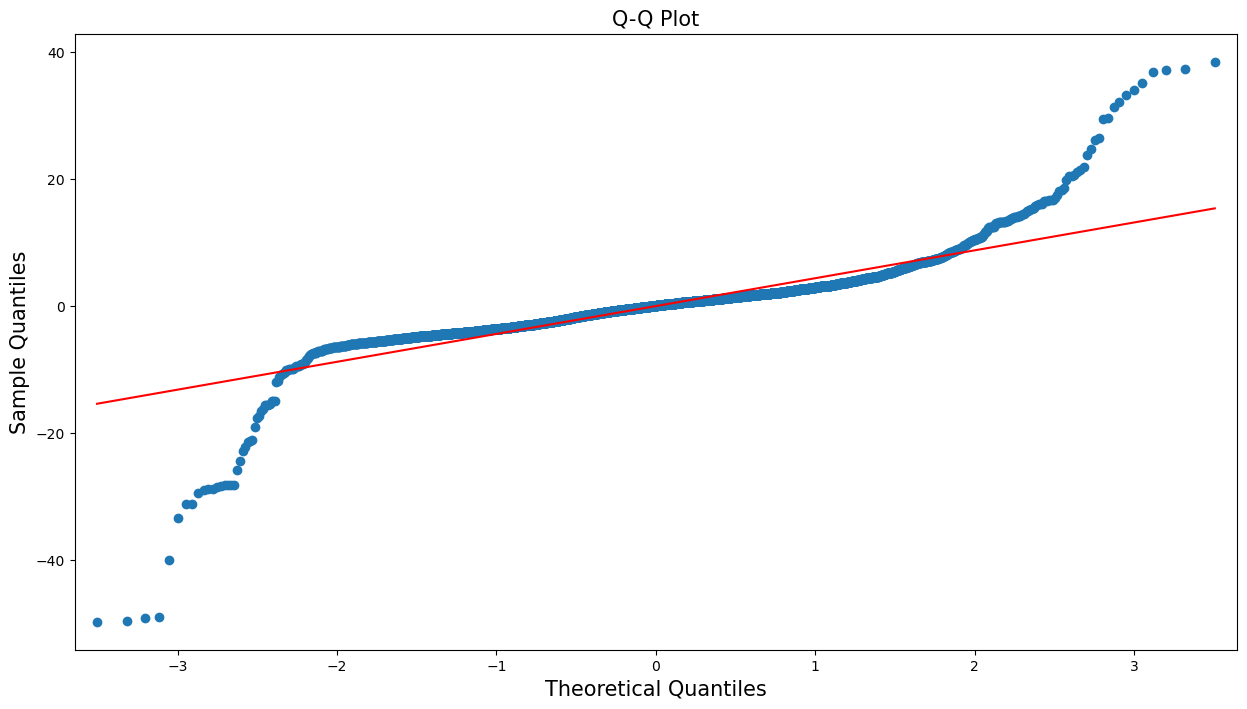

In [62]:
from statsmodels.graphics.gofplots import qqplot

plt.rcParams['figure.figsize'] = [15,8]

qqplot(MLR_model1.resid, line = 'r')

plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)

plt.show()

 The diagonal line (red line) is the regression line and the blue points are the cumulative distribution of the residuals. As some of the points are not close to the diagonal line, we conclude that the residuals do not follow a `normal distribution.` Also shows presence of skewness and kurtosis.

###  Assumption #5: Tests for Multicollinearity

### Variation Inflation Factor
Variance Inflation Factor (VIF) is a measure used to assess multicollinearity in a multiple linear regression model. Higher VIF values indicate higher levels of multicollinearity, with values above 5 or 10 commonly considered as indicating high multicollinearity. Lower VIF values indicate lower levels of multicollinearity, with values closer to 1 indicating minimal multicollinearity.

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["Features"] = X_train.columns
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,4697.449700,Fuel_Consumption_Comb
1,2065.955610,Fuel_Consumption_City
2,633.396783,const
3,593.081592,Fuel_Consumption_Hwy
4,13.436094,Fuel Type_Premium gasoline
5,12.266414,Fuel Type_Regular gasoline
6,10.176613,Engine_Size
7,10.119507,Fuel_Consumption_Comb1
8,9.597330,Cylinders
9,4.815837,Fuel Type_Ethanol


Fuel_Consumption_Comb,Fuel_Consumption_City,Fuel_Consumption_Hwy are highly correlated 

### Feature Scaling Using Standardization

The features have different scales and units of measurement, so scaling could be beneficial to ensure that 
all features are on a similar scale

In [67]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [68]:
X_train

array([[ 0.        , -0.23711383,  1.14562957, ..., -0.28738891,
        -0.16648508, -0.06754514],
       [ 0.        , -0.23711383, -0.87288249, ..., -0.99379417,
        -1.22340859,  1.43347179],
       [ 0.        , -0.23711383, -0.87288249, ...,  1.47862423,
         1.1972872 , -1.15919382],
       ...,
       [ 0.        , -0.23711383, -0.87288249, ...,  0.10996405,
         0.44721245, -0.61336948],
       [ 0.        , -0.23711383,  1.14562957, ...,  1.03712095,
         0.6858726 , -0.74982557],
       [ 0.        , -0.23711383, -0.87288249, ..., -0.37568957,
        -0.33695661,  0.06891094]])

# Model Building 

## Linear Regression

In [69]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)


LinearRegression()

In [70]:
lin_model.intercept_

250.4513193812557

In [71]:
lin_model.coef_

array([  0.        , -30.93194407, -14.79054826, -14.92183096,
        -0.60316795,  -0.63058837,  -0.27456399,  -0.48246883,
         0.17559144,  -0.29942523,  -0.07948582,   0.62010578,
         0.35973189,   0.69377497,   0.20671078,   1.89206225,
        22.41952151,  10.55837318,  26.06475388,  -6.0567148 ])

In [72]:
y_pred = lin_model.predict(X_test)
y_pred

array([293.36772922, 235.50741262, 284.91996294, ..., 311.23267776,
       298.43722051, 320.16697842])

### Model Evaluation

In [73]:
print('RMSE: {:0.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))
print('MAE: {:0.4f}'.format(mean_absolute_error(y_test,y_pred)))
print('R2_score: {:0.4f}'.format(r2_score(y_test,y_pred)))

RMSE: 5.5826
MAE: 3.1533
R2_score: 0.9914


## Regularization

## Ridge Regression

In [74]:
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)

Ridge(alpha=0.1)

In [75]:
y_ridge = model.predict(X_test)
y_ridge

array([293.36669808, 235.51576781, 284.9136706 , ..., 311.22232843,
       298.44650632, 320.15861679])

### Model Evaluation

In [76]:
print('RMSE: {:0.4f}'.format(np.sqrt(mean_squared_error(y_test,y_ridge))))
print('MAE: {:0.4f}'.format(mean_absolute_error(y_test,y_ridge)))
print('R2_score: {:0.4f}'.format(r2_score(y_test,y_ridge)))

RMSE: 5.5819
MAE: 3.1533
R2_score: 0.9914


## Lasso Regression

In [ ]:
model = Lasso(alpha=0.1)
model.fit(X_train, y_train)

In [77]:
y_lasso = model.predict(X_test)
y_lasso

array([293.36669808, 235.51576781, 284.9136706 , ..., 311.22232843,
       298.44650632, 320.15861679])

### Model Evaluation

In [78]:
print('RMSE: {:0.4f}'.format(np.sqrt(mean_squared_error(y_test,y_lasso))))
print('MAE: {:0.4f}'.format(mean_absolute_error(y_test,y_lasso)))
print('R2_score: {:0.4f}'.format(r2_score(y_test,y_lasso)))

RMSE: 5.5819
MAE: 3.1533
R2_score: 0.9914


## Decision Tree Regression

In [157]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state = 42)

dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [158]:
dtr_pred = dt_model.predict(X_test)
dtr_pred

array([295. , 236.5, 283. , ..., 310.5, 298. , 322. ])

### Model Evaluation

In [159]:
print('RMSE: {:0.4f}'.format(np.sqrt(mean_squared_error(y_test,dtr_pred))))
print('MAE: {:0.4f}'.format(mean_absolute_error(y_test,dtr_pred)))
print('R2_score: {:0.4f}'.format(r2_score(y_test,dtr_pred)))

RMSE: 5.0328
MAE: 2.4864
R2_score: 0.9930


## Random Forest Regression

In [160]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [164]:
y_rf_pred = rf_model.predict(X_test)
y_rf_pred.mean()

252.90784915600167

### Model Evaluation

In [162]:
print('RMSE: {:0.4f}'.format(np.sqrt(mean_squared_error(y_test,y_rf_pred))))
print('MAE: {:0.4f}'.format(mean_absolute_error(y_test,y_rf_pred)))
print('R2_score: {:0.4f}'.format(r2_score(y_test,y_rf_pred)))

RMSE: 4.2504
MAE: 2.3200
R2_score: 0.9950


In [82]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create a dictionary to store the algorithm names and their corresponding models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=0.1),
    'Lasso Regression': Lasso(alpha=0.1),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
    'Random Forest Regression': RandomForestRegressor()
}

# Create lists to store the evaluation metrics
algorithm_names = []
r2_scores = []
mae_scores = []
rmse_scores = []

# Loop through the models, fit the model, make predictions, and calculate the metrics
for name, model in models.items():
    algorithm_names.append(name)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    r2_scores.append(r2)
    mae_scores.append(mae)
    rmse_scores.append(rmse)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Algorithm': algorithm_names,
    'R2 Score': r2_scores,
    'MAE': mae_scores,
    'RMSE': rmse_scores
})

# Display the tabular chart
print(results_df)


                  Algorithm  R2 Score       MAE      RMSE
0         Linear Regression  0.991374  3.153336  5.582638
1          Ridge Regression  0.991376  3.153267  5.581915
2          Lasso Regression  0.991178  3.218224  5.645769
3  Decision Tree Regression  0.992989  2.486442  5.032842
4  Random Forest Regression  0.995020  2.334947  4.241731


## Extracting Feature Importance from the best model

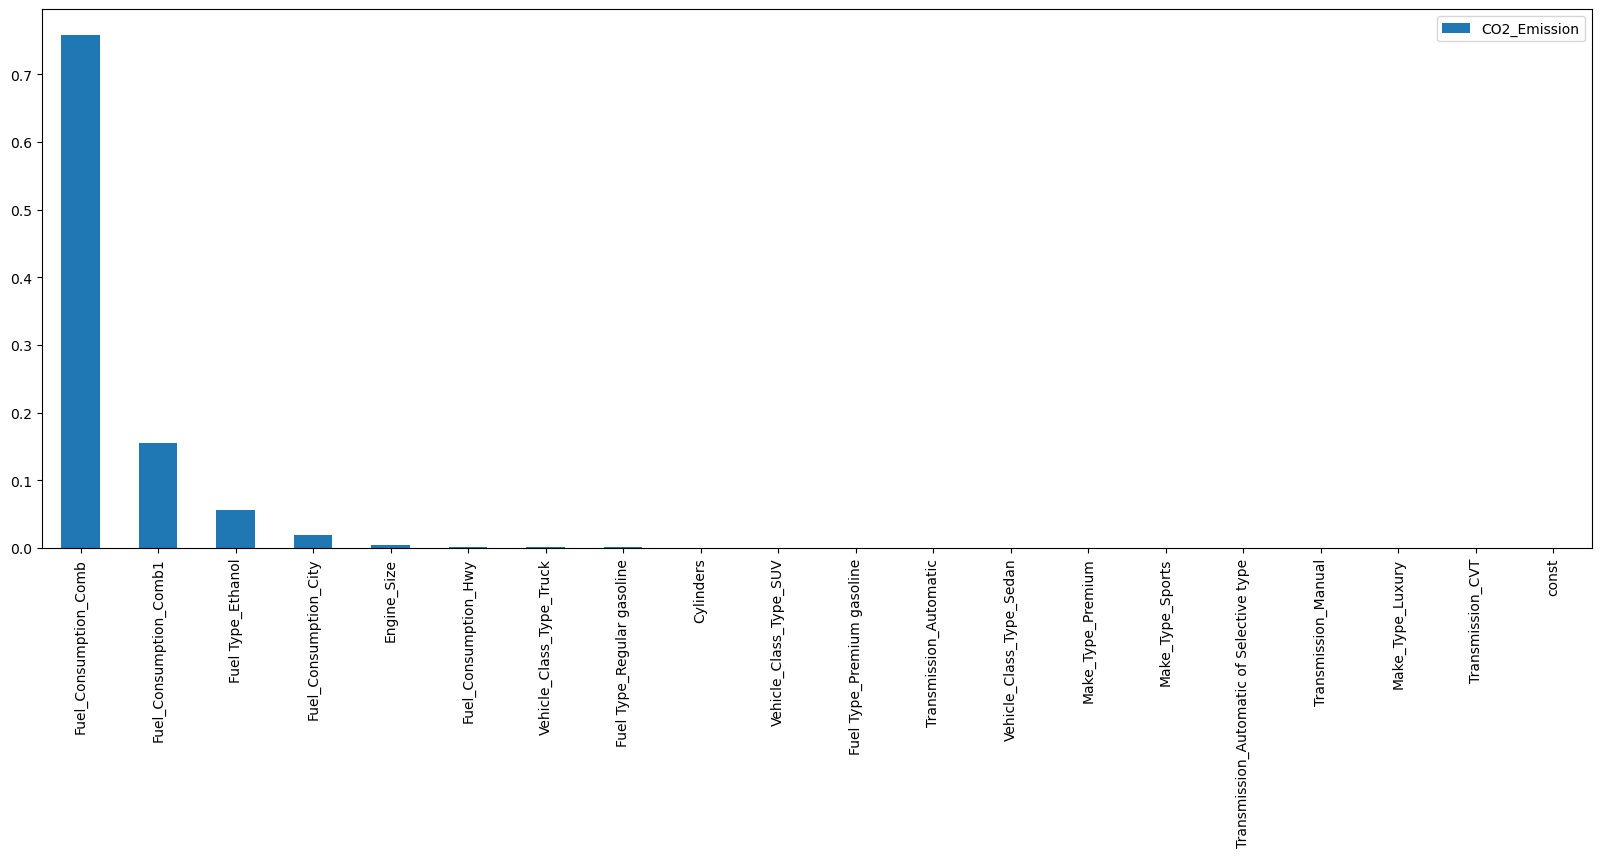

In [163]:
import pandas as pd
pd.DataFrame(rf_model.feature_importances_,index=X.columns,columns=['CO2_Emission']).sort_values("CO2_Emission",ascending=False).plot(kind='bar',figsize=(20,7))
plt.show()

# Conclusion

### Algorithms Used :
In this project we have used Linear Regression, Decision Trees and Random Forest. We also added Regularization Techniques to check the performance of the models

### Final Model Algorithm :
Among the models that we tried building, Random Forest performed the best in terms of r2 score


### Model Performance Measures :
#####  Random Forest

RMSE: 4.2504

MAE: 2.3200

R2_score: 0.9950

